# Mempersiapkan data

 kamu bisa mendapatkan datanya di kaggle "https://www.kaggle.com/datasets/salader/dogs-vs-cats/data" dengan cara mendownload secara langsung ke local device, atau mendownload langsung di google colab dengan memanfaatkan api kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 236MB/s]
100% 1.06G/1.06G [00:04<00:00, 249MB/s]


In [3]:
# unzip file
import zipfile

# gunakan with statement agar otomatis tutup file yang digunakan
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [4]:
# import tools yang akan digunakan
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout #penambahan import batch dan dropout karena data overfiting

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4)) #naikkan nilai dropout jika data accuracy pelatihan sangat tinggi dan accuracy validasi rendah (gap tinggi)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.5356 - loss: 4.3974 - val_accuracy: 0.5188 - val_loss: 0.6890
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 82ms/step - accuracy: 0.5552 - loss: 0.7199 - val_accuracy: 0.5756 - val_loss: 0.6675
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.5875 - loss: 0.6725 - val_accuracy: 0.6096 - val_loss: 0.6178
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6504 - loss: 0.6212 - val_accuracy: 0.5400 - val_loss: 0.7407
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.6727 - loss: 0.6153 - val_accuracy: 0.7034 - val_loss: 0.5632
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7317 - loss: 0.5366 - val_accuracy: 0.7292 - val_loss: 0.5164
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.7659 - loss: 0.4963 - val_accuracy: 0.6840 - val_loss: 0.5481
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.7894 - loss: 0.4581 - 

notes: Overfitting dalam machine learning adalah situasi ketika model terlalu "terlatih" pada data pelatihan, sehingga performanya sangat baik pada data tersebut tetapi kurang mampu melakukan generalisasi pada data baru atau data uji.

data yang mengalami overfiting :

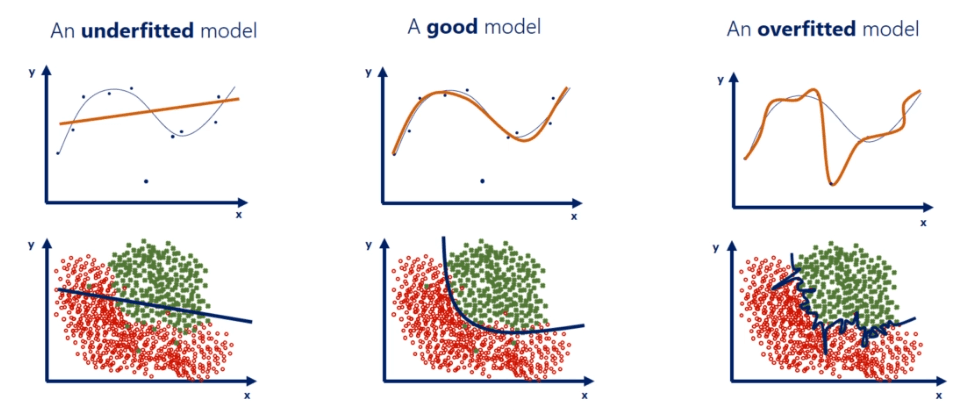

Beberapa metode untuk mencegah atau mengurangi overfitting adalah:

- Menggunakan lebih banyak data: Menambahkan lebih banyak data pelatihan dapat membantu model mengenali pola umum daripada mempelajari detail-detail kecil.

- Regularisasi (L1 atau L2): Regularisasi dapat menambahkan penalti terhadap kompleksitas model sehingga model menjadi lebih sederhana.

- Dropout (pada neural network): Teknik ini mengabaikan sebagian neuron secara acak selama pelatihan, sehingga model tidak terlalu bergantung pada neuron tertentu.

- Cross-Validation: Teknik ini melatih dan menguji model di beberapa subset data untuk memastikan model dapat generalisasi dengan baik.




---


- Regularisasi (L1/L2):
Kapan digunakan: Jika model yang Anda gunakan cukup kompleks (misalnya, jaringan saraf dengan banyak parameter atau model regresi yang memiliki banyak fitur).
Cara kerja: Regularisasi menambahkan penalti pada besar kecilnya parameter, yang membuat model lebih simpel dan kurang rentan terhadap overfitting.
Catatan: Regularisasi sering kali menjadi pilihan pertama karena relatif mudah diimplementasikan dan dapat diterapkan di hampir semua model machine learning.

- Dropout (untuk Jaringan Saraf):
Kapan digunakan: Khusus untuk model jaringan saraf, terutama jika model memiliki banyak layer atau neuron.
Cara kerja: Dropout secara acak "mengabaikan" sejumlah neuron selama pelatihan, sehingga model tidak terlalu bergantung pada neuron tertentu dan menjadi lebih robust.
Catatan: Jika model Anda bukan jaringan saraf, dropout tidak relevan. Biasanya, dropout digunakan setelah regularisasi jika model masih menunjukkan tanda overfitting.

- Early Stopping:
Kapan digunakan: Ini adalah pilihan yang baik ketika Anda memantau kurva loss atau accuracy pada data validasi dan melihat tanda-tanda overfitting setelah sejumlah epoch.
Cara kerja: Early stopping menghentikan pelatihan ketika performa pada data validasi mulai memburuk, mencegah model belajar terlalu banyak dari data latih.
Catatan: Early stopping adalah teknik yang efektif dan dapat digabungkan dengan teknik lain (misalnya, regularisasi dan dropout).

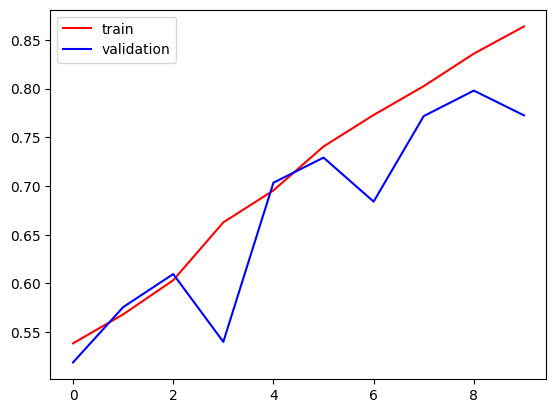

In [11]:
# menampilkan data accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

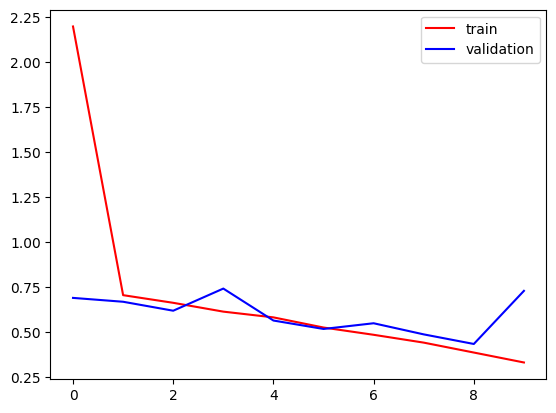

In [12]:
# tampilan loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

saatnya menguji model

- download gambar dog/cat dari google untuk menguji

In [13]:
import cv2

In [79]:
test_img = cv2.imread('/content/dog03.jpg')

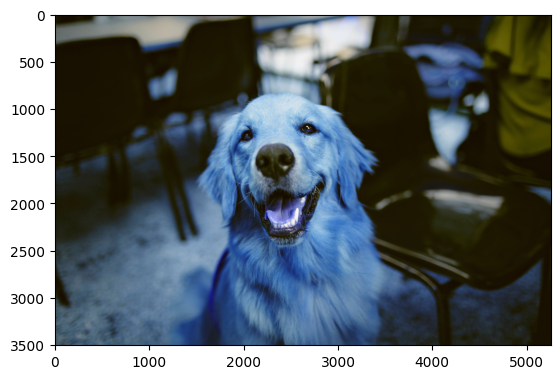

In [80]:
plt.imshow(test_img)

In [81]:
test_img.shape

(3505, 5257, 3)

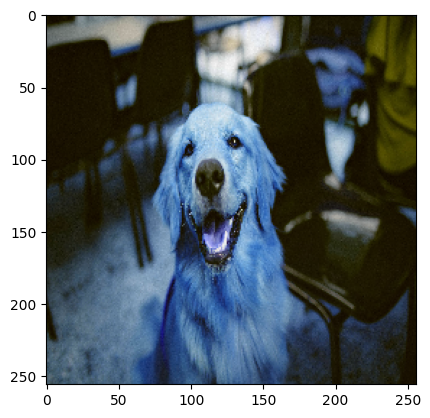

In [82]:
test_img = cv2.resize(test_img,(256,256))
plt.imshow(test_img)

In [83]:
test_img.shape

(256, 256, 3)

In [84]:
test_input = test_img.reshape((1,256,256,3))

In [85]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

In [86]:
threshold = 0.5
output = model.predict(test_input)
class_output = [1 if prob > threshold else 0 for prob in output]
for index, output_value in enumerate(class_output):
    kategori = 'dog' if output_value == 1 else 'cat'
    print(f'Output "{output_value}" : this is {kategori}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Output "1" : this is dog
